## Imports

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Datasets

In [13]:
df = pd.read_csv('./train.csv')

In [14]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Data Cleaning

In [16]:
X = df.drop(['label'], axis=1).values
y = df['label'].values.flatten()

In [17]:
print((min(X[1]), max(X[1])))

(0, 255)


In [18]:
X = X.astype('float32')

X /= 255

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
def display_digits(X, Y):
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle("Display randomly images of the training data set")

    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind, :].reshape(28,28)
            ax[i, j].set_title("Label: {}".format(Y[ind]))
            ax[i, j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i, j].get_xticklabels(), visible=False)
            plt.setp(ax[i, j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5) 

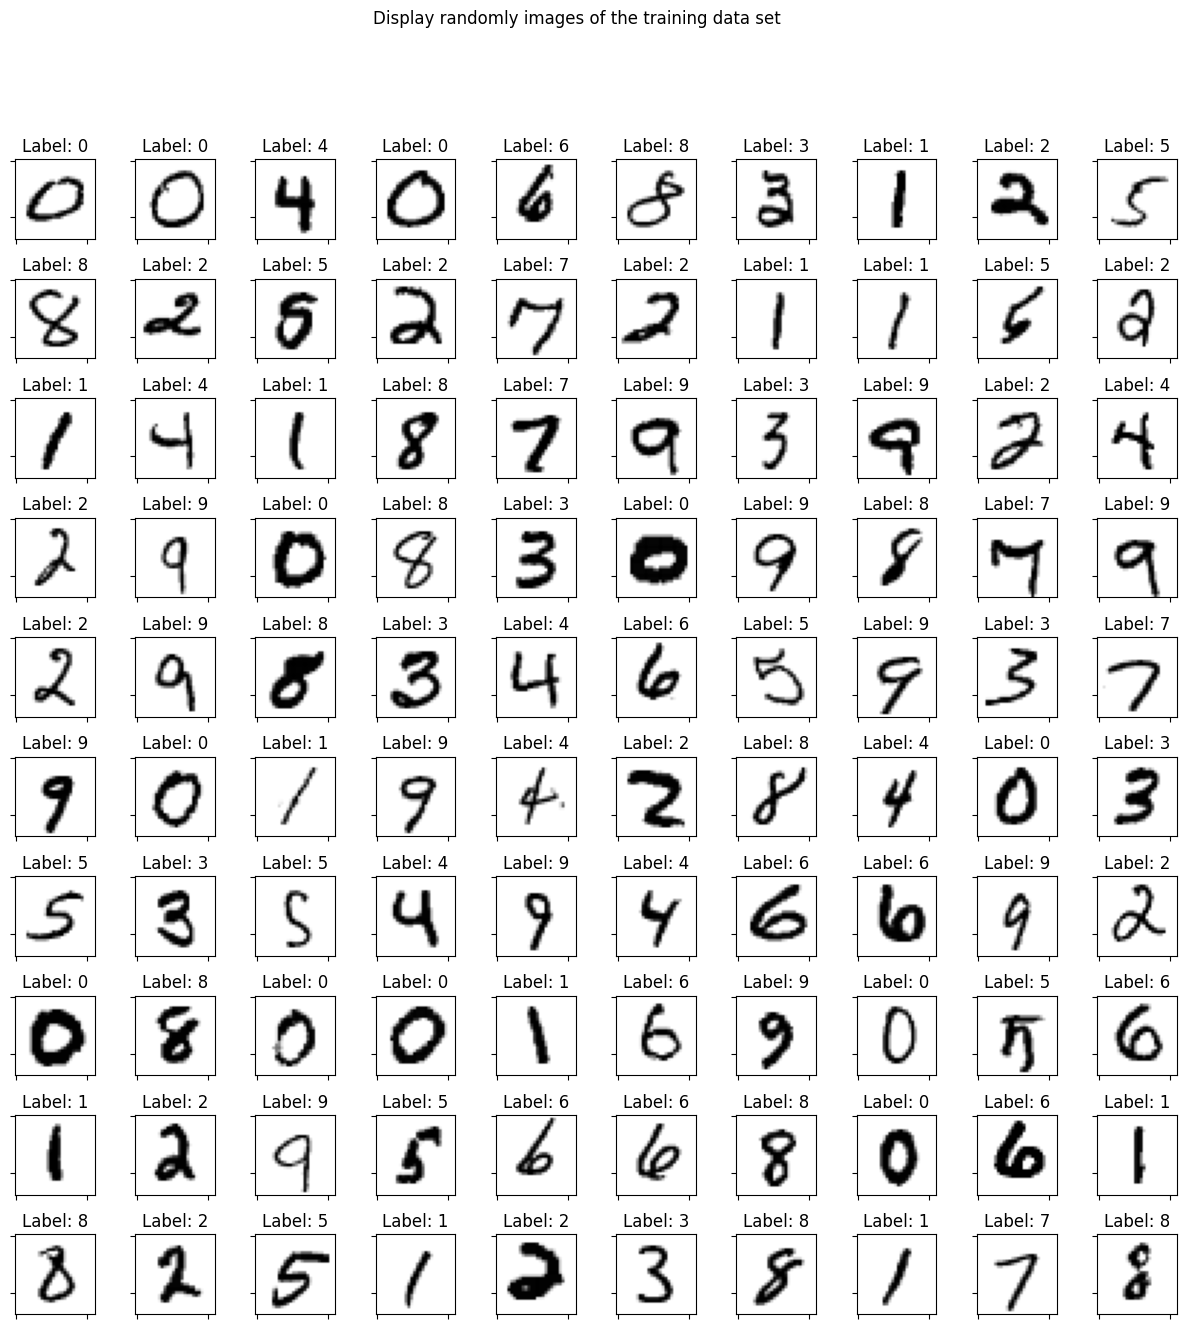

In [26]:
display_digits(X_train, y_train)

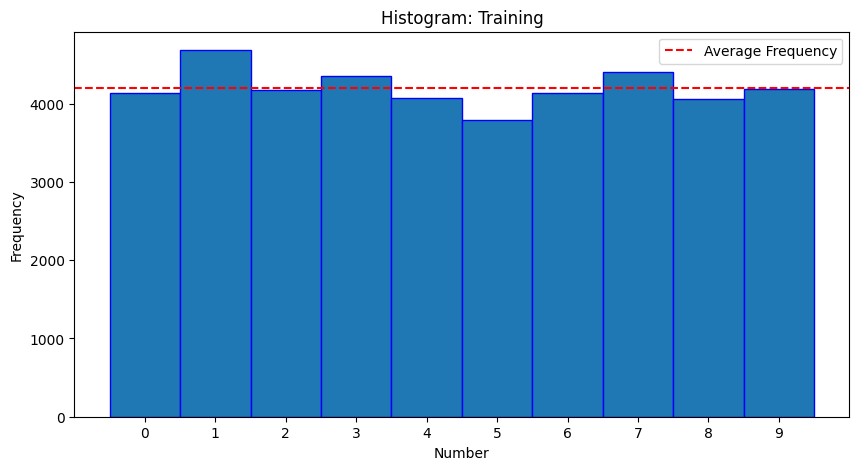

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.hist(y,bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], edgecolor='b', histtype='bar', align='left')
ax.set_title('Histogram: Training')
ax.set(xlabel='Number', ylabel='Frequency')
ax.xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.axhline(y=(y.size / 10), label='Average Frequency', linestyle='dashed', color='r')
ax.legend()

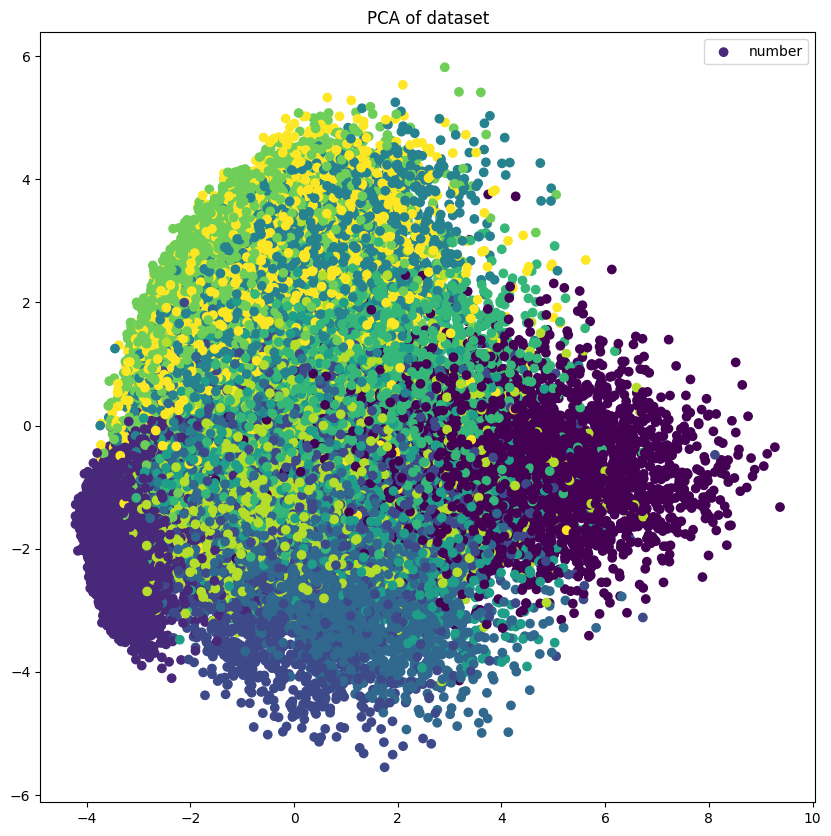

In [30]:
pca = PCA(n_components=2)

proj = pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.set_title('PCA of dataset')
ax.scatter(proj[:,0], proj[:,1], c=y, label='number')
ax.legend()

## Model

In [44]:
model = LogisticRegression(max_iter=1000)

In [45]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_predict = model.predict(X_test)

In [47]:
print('Training Accuracy: {:3.2f} %'.format(model.score(X_test, y_test) * 100))

Training Accuracy: 91.98 %


In [52]:
c_matrix = confusion_matrix(y_test, y_predict)

Text(0.5, 80.7222222222222, 'Predicted Label')

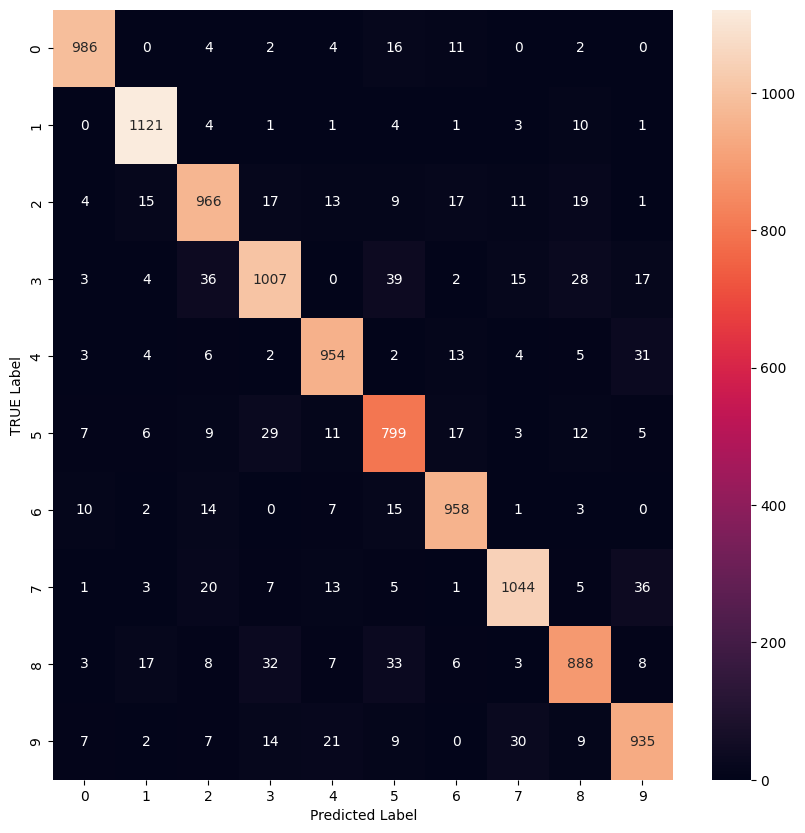

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(c_matrix, annot=True, ax=ax, fmt='g', vmin=0)
ax.set_ylabel('TRUE Label')
ax.set_xlabel('Predicted Label')

## Inference

In [55]:
def predict(x, model):
    y_predict = model.predict(x)
    
    return y_predict[0]

In [59]:
label = predict(X[-1].reshape(1, -1), model)

In [60]:
print(f'Predicted label {label}')

Predicted label 9
